In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data =pd.read_csv('Mall_Customers.csv', index_col = 0)  #index_col에 칼럼 숫자를 넣어주면 index으로 들어가진다

In [6]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [8]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [9]:
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

In [10]:
data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0
...,...,...,...,...
196,35,120,79,0
197,45,126,28,0
198,32,126,74,1


In [17]:
from sklearn.cluster import KMeans

In [18]:
model = KMeans(n_clusters=3)

In [24]:
model.fit(data)

KMeans(n_clusters=3)

In [25]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [15]:
result_df = data.copy()

In [26]:
result_df['label'] = model.labels_

In [27]:
result_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,label
CustomerID,,,,,
1,19,15,39,1,1
2,21,15,81,1,1
3,20,16,6,0,1
4,23,16,77,0,1
5,31,17,40,0,1
...,...,...,...,...,...
196,35,120,79,0,0
197,45,126,28,0,2
198,32,126,74,1,0


In [28]:
result_df.groupby('label').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,32.692308,86.538462,82.128205,0.461538
1,40.325203,44.154472,49.829268,0.406504
2,40.394737,87.000000,18.631579,0.526316


In [31]:
result_df['label'].value_counts()

1    123
0     39
2     38
Name: label, dtype: int64

In [32]:
distance = []

for i in range(2,11):
    model = KMeans(n_clusters=i)
    model.fit(data)
    distance.append(model.inertia_)

In [33]:
distance

[212889.44245524294,
 143391.59236035674,
 104414.67534220174,
 75528.58656469136,
 58348.64136331504,
 51130.69008126375,
 44684.92754188377,
 41298.0166014541,
 37606.56925269854]

<AxesSubplot:>

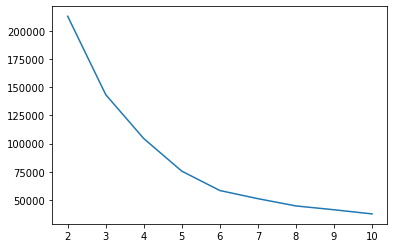

In [34]:
sns.lineplot(x=list(range(2,11)), y=distance)

- n_clusters 늘어날수록 개선되지 않으므로 silhouette_score으로 찾기

In [35]:
from sklearn.metrics import silhouette_score

In [36]:
silhouette_score(data, model.labels_)

0.38272535172387234

In [37]:
sil = []

for i in range(2,11):
    model = KMeans(n_clusters= i)
    model.fit(data)
    sil.append(silhouette_score(data, model.labels_))

In [38]:
sil

[0.29307334005502633,
 0.383798873822341,
 0.4052954330641215,
 0.4440669204743008,
 0.4513562828608042,
 0.44096462877395787,
 0.4275788369618678,
 0.4134123971780628,
 0.3815046839569602]

<AxesSubplot:>

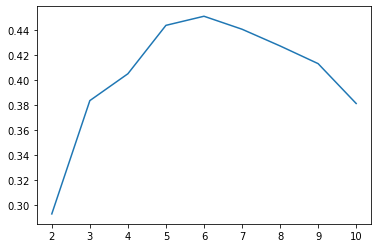

In [40]:
sns.lineplot(x=list(range(2,11)), y=sil)

- silhouette_score이 가장 큰게 좋은거임

- n_clusters이 6이 가장 좋은거임

In [41]:
model = KMeans(n_clusters=6)

In [43]:
model.fit(data)

KMeans(n_clusters=6)

In [44]:
data['label'] = model.labels_

In [45]:
data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,label
CustomerID,,,,,
1,19,15,39,1,0
2,21,15,81,1,5
3,20,16,6,0,0
4,23,16,77,0,5
5,31,17,40,0,0
...,...,...,...,...,...
196,35,120,79,0,2
197,45,126,28,0,3
198,32,126,74,1,2


In [46]:
data.groupby('label').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,44.142857,25.142857,19.523810,0.380952
1,27.000000,56.657895,49.131579,0.342105
2,32.692308,86.538462,82.128205,0.461538
3,41.685714,88.228571,17.285714,0.571429
4,56.155556,53.377778,49.088889,0.444444
5,25.272727,25.727273,79.363636,0.409091


In [47]:
data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,label
CustomerID,,,,,
1,19,15,39,1,0
2,21,15,81,1,5
3,20,16,6,0,0
4,23,16,77,0,5
5,31,17,40,0,0
...,...,...,...,...,...
196,35,120,79,0,2
197,45,126,28,0,3
198,32,126,74,1,2


<AxesSubplot:xlabel='label', ylabel='Age'>

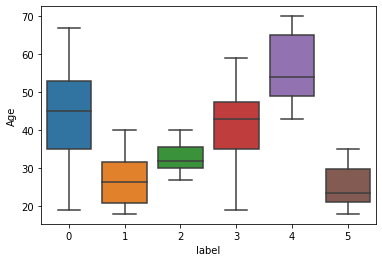

In [48]:
sns.boxplot(x='label', y='Age', data=data)

<AxesSubplot:xlabel='label', ylabel='Annual Income (k$)'>

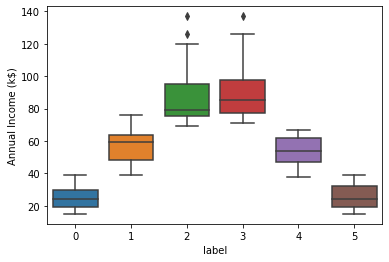

In [49]:
sns.boxplot(x='label', y='Annual Income (k$)', data=data)

<AxesSubplot:xlabel='label', ylabel='Spending Score (1-100)'>

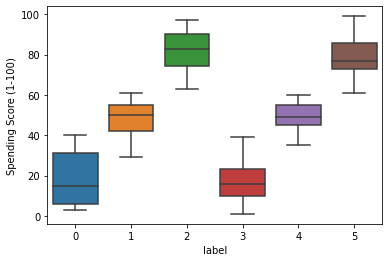

In [50]:
sns.boxplot(x='label', y='Spending Score (1-100)', data=data)

# PCA와 Scatter Plot으로 결과 한눈에 보기

- Python PCA 구현하기
  python PCA(Principal Components Analysis, 주성분 분석) 구현하기.
  PCA는 X 선형 결합의 분산을 최대화하는 변수를 추출하는 알고리즘으로 고차   원의 데이터를 저차원의 데이터로 축소한다.
  
  -PCA의 계산 과정을 요약하면 다음과 같다.

    1.Data Normalizing (Mean Centering)
    2.Covariance Matrix 구하기
    3.Covariance Matrix 고유값 분해(Eigendecomposition)
    4.eigen value 크기순으로 정렬
    5.eigen vector와 X를 곱하여 추출 변수 Z 구하기

In [51]:
data.drop('label',axis=1,inplace=True)

In [52]:
data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0
...,...,...,...,...
196,35,120,79,0
197,45,126,28,0
198,32,126,74,1


In [53]:
from sklearn.decomposition import PCA

In [54]:
pca = PCA(n_components=2)

In [55]:
pca.fit(data)

PCA(n_components=2)

In [57]:
pca_df = pca.transform(data) #넘파이 형태로 나옴

In [61]:
pca_df = pd.DataFrame(pca_df, columns=['PC1','PC2'])

- 칼럼 4개를 2개로 줄임

In [62]:
pca_df

,PC1,PC2
0,-31.869945,-33.001252
1,0.764494,-56.842901
2,-57.408276,-13.124961
3,-2.168543,-53.478590
4,-32.174085,-30.388412
...,...,...
195,58.352515,31.017542
196,19.908001,66.446108
197,58.520804,38.346039
198,20.979130,79.376405


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

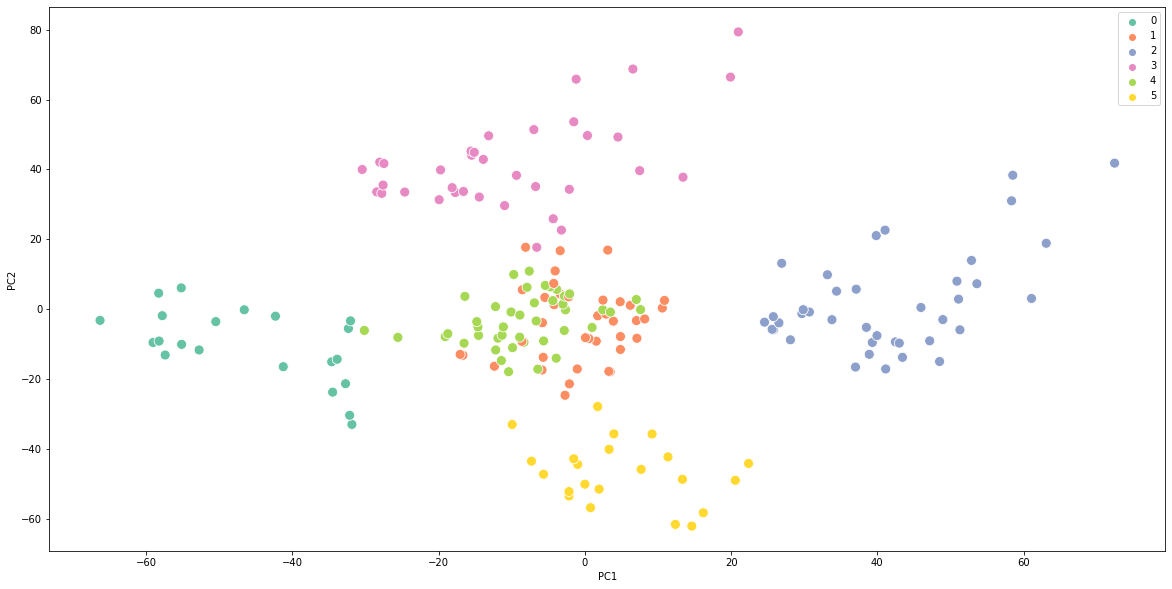

In [71]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=model.labels_, palette='Set2', s=100)